# HOMEWORK 3

## Q1

### First  Condition 
$$
\| x \| \ > 0 \quad  \lor  \quad \| x \| = 0 \implies x = 0 \\
\sup_{\|y\|=1}{|{ y^*x}|} > 0 \\
y_1 * x_1 + x_2 * y_2 \dots x_m * y_m \neq  0 
$$
as we can choose a unit vector $y$ that satisfy $$x_i * y_i$$ is not equal 0. Let say $y_i$ = 1 and other entries equals 0 so we already obtain a value greater than 0. Hence, we look for superium the result must be greater or equal 
$|y_i * x_i|$. If $x$ is equal 0 vector, it is clear that the result is 
### Second Contidition
$$
\| x + z \| \leq \|x\| + \|z\| \\
| y^* x + y^*z | \leq |y^*x| + |y^*z| \\
$$
as all terms are complex numbers we can use $|a+b| \leq |a| + |b| $ the ineqaulity.

### Third Condition
$$
\| \alpha y^*x \| = |\alpha|\|y^*x\| \\
y^*x = z \in \mathbb{C} \\
\alpha z^*\alpha z = \alpha^2 z^*z
$$
as scalar variables can be moved in matrix product, the equality holds.

## Q2
$$
A^* = A^T \\
\Sigma \in \mathbb{R}^{m x n} \\
AA^* = U \Sigma^2 U^* = (U^*)^T \Sigma^2 U^T \\
A^*A = V \Sigma^2 V^* = (V^*)^T \Sigma^2 V^T 
$$

Observe that $AA^*$ is symmetric matrix and $\Sigma$ is known as real matrix. 
To sustain symmetrically 

$$
(U^*)^T = U \quad \land \quad U^T = U^* \\
(V^*)^T = V \quad \land \quad V^T = V^* \\
U^T = U^* \implies U \in \mathbb{R}^{m x m} \\
V^T = V^* \implies V \in \mathbb{R}^{n x n} \\
$$

## Q3

In [79]:
function Q = calculate_angle(M)
    x = 2 * M(1,1) * M(2,1) + 2*M(1,2)*M(2,2);
    y = M(1,1)^2 + M(1,2)^2 - (M(2,1)^2 + M(2,2)^2);
    Q = 0.5 * atan2(x,y);
endfunction
function U = construct_matrix(Q)
    U = [cos(Q) -sin(Q); sin(Q) cos(Q)];
endfunction
function sigma = find_sigma(M)
    a = M(1,1);
    b = M(1,2);
    c = M(2,1);
    d = M(2,2);
    e = sqrt(roots([1 ,-a-d ,a*d-b*c]));
    sigma = [e(1) 0; 0 e(2)];
endfunction
function [U S V] = find_svd(A)
    AU = A*A';
    U = construct_matrix(calculate_angle(AU));
    S = find_sigma(AU);
    V = linsolve(U*S,A)';
endfunction
A = [-2,11;-10,5] ;
[U S V] = svd(A);
[X Y Z] = find_svd(A);
function [norm1,norm2,norminf,normfro] = find_norms(A)
    C = abs(A);
    norm1 = max((sum(C(:,1))),(sum(C(:,2))));
    norm2 = max(diag(find_sigma(A*A')));
    norminf =max(sum(C(1,:)),sum(C(2,:)));
    normfro = sqrt(sum(diag(A'*A)));
endfunction
function Inv = find_inverse(A)
        [U S V] =  find_svd(A);
        s = diag(S);
        Inv_S = diag(s.^-1);
        Inv = V*Inv_S*U';
endfunction
function eigen = find_eigen(M)
    a = M(1,1);
    b = M(1,2);
    c = M(2,1);
    d = M(2,2);
    eigen = (roots([1 ,-a-d ,a*d-b*c]));
endfunction
A = [-2 11; -10 5];
%%%
%%
%%%
%%%
%%%


### Part A
$U$ is calculated by using sin and cos representation of U.  
$\Sigma$ is calculated with the sqrt of roots of $det(A^*A-I\alpha)$.  
$V$ is calculated with $V = (A(U\Sigma)^-1)^T$ linear solution.

In [95]:
[U S V] = find_svd(A)

U =

   0.70711  -0.70711
   0.70711   0.70711

S =

   14.14214    0.00000
    0.00000    7.07107

V =

  -0.60000  -0.80000
   0.80000  -0.60000



### PART B

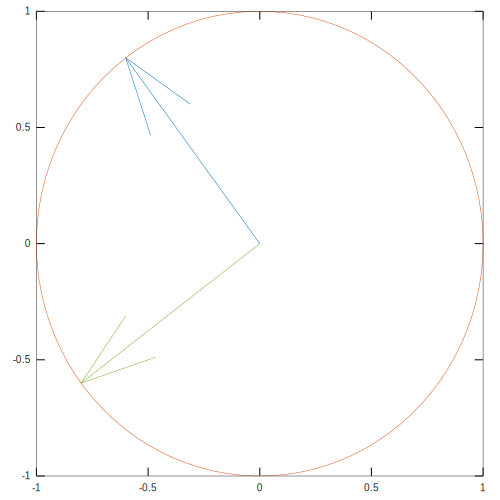

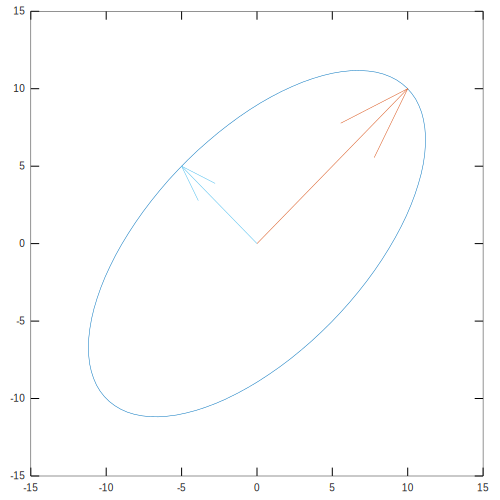

In [125]:
range1 = U(:,1);
range2 = U(:,2);
domain1 = V(:,1);
domain2 = V(:,2);
%% The code is from http://stackoverflow.com/questions/7971467/how-to-draw-a-circle-in-gnu-octave
figure('Position', [0 0 250 250]);
t = linspace(0,2*pi,100)'; 
r =1;
circsx = r.*cos(t); 
circsy = r.*sin(t);
quiver(0,0,domain1(1),domain1(2));
hold on;
quiver(0,0,domain2(1),domain2(2));
hold on;
plot(circsx,circsy);
hold on;
%%%%%%%%%%%%
figure('Position', [0 0 500 500]);
x = A * [circsx';circsy'];
plot(x(1,:),x(2,:));
hold on;
quiver(0,0,S(1,1)*range1(1),S(1,1)*range1(2));
hold on;
quiver(0,0,S(2,2)*range2(1),S(2,2)*range2(2));





### PART C

In [64]:
[norm1 norm2 norminf norminf] = find_norms(A)

norm1 =  16
norm2 =  14.142
norminf =  15
norminf =  15.811


### PART D
$$A^{-1}A^ = I \\
V\Sigma^{-1}U^* U\Sigma V^* = I
$$
$U$ and $V$ unitary.  
$\Sigma$ is diagonal.

In [66]:
Inverse_of_A = find_inverse(A)

Inverse_of_A =

   0.050000  -0.110000
   0.100000  -0.020000



### PART E and F
Answer is very such small that is not larger than machine epsilon.

In [81]:
Eigenvalues = find_eigen(A)
diff_of_my_det_and_built_in_det =abs(Eigenvalues(1)*Eigenvalues(2)) - det(A)

Eigenvalues =

   1.5000 + 9.8869i
   1.5000 - 9.8869i

diff_of_my_det_and_built_in_det =    1.4211e-14


### PART G

In [89]:
sigmas = diag(find_sigma(A'*A));
ares = sigmas(1)*sigmas(2)*pi

ares =  314.16
